In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
gpt4_pathgen="/share/data/mei-work/kangrui/github/mango/kangrui/eval_results/results_gpt_overall_0709/gpt-4/pathgen/sorted_result_loose_2023-07-10-02-35-11_760.csv"
gpt4_stepnav="/share/data/mei-work/kangrui/github/mango/kangrui/eval_results/results_gpt_overall_0709/gpt-4/stepnav/sorted_result_loose_2023-07-10-02-34-11_399.csv"
gpt3_pathgen="/share/data/mei-work/kangrui/github/mango/kangrui/eval_results/results_gpt_overall_0709/gpt-3.5-turbo/pathgen/sorted_result_loose_2023-07-10-02-38-26_138.csv"
gpt3_stepnav="/share/data/mei-work/kangrui/github/mango/kangrui/eval_results/results_gpt_overall_0709/gpt-3.5-turbo/stepnav/sorted_result_loose_2023-07-10-02-36-53_691.csv"

In [9]:
df = pd.read_csv(gpt4_pathgen)
game_names=df['name'].tolist()[:-2]

In [17]:
mode="hard"
df = pd.read_csv(gpt4_pathgen)
gpt4_pathgen_success_rate=df[f'{mode}_success_rate'].tolist()[:-2]
gpt4_pathgen_reasoning_acc=df[f'{mode}_reasoning_acc'].tolist()[:-2]

df = pd.read_csv(gpt4_stepnav)
gpt4_stepnav_success_rate=df[f'{mode}_success_rate'].tolist()[:-2]
gpt4_stepnav_reasoning_acc=df[f'{mode}_reasoning_acc'].tolist()[:-2]

df = pd.read_csv(gpt3_pathgen)
gpt3_pathgen_success_rate=df[f'{mode}_success_rate'].tolist()[:-2]
gpt3_pathgen_reasoning_acc=df[f'{mode}_reasoning_acc'].tolist()[:-2]

df = pd.read_csv(gpt3_stepnav)
gpt3_stepnav_success_rate=df[f'{mode}_success_rate'].tolist()[:-2]
gpt3_stepnav_reasoning_acc=df[f'{mode}_reasoning_acc'].tolist()[:-2]

In [18]:
import random
random.seed(10)

In [19]:
from adjustText import adjust_text
def plot_vs(savepath, model1_nice_scores, model2_nice_scores, game_names,font_size=40,label_size=45):
    
    skip_nan_l1=[]
    skip_nan_l2=[]
    skip_nan_game_names=[]
    for idx,item in enumerate(model1_nice_scores):
        if math.isnan(model1_nice_scores[idx]) or math.isnan(model2_nice_scores[idx]):
            continue
        skip_nan_l1.append(model1_nice_scores[idx])
        skip_nan_l2.append(model2_nice_scores[idx])
        skip_nan_game_names.append(game_names[idx])
    
    model1_nice_scores=skip_nan_l1
    model2_nice_scores=skip_nan_l2
    game_names=skip_nan_game_names
    
        
    plt.figure(figsize=(10, 10))
    plt.tight_layout()
    plt.scatter(model1_nice_scores, model2_nice_scores, s=600, alpha=0.5)
    plt.plot([0, 1], [0, 1], color="lightcoral", linestyle="--", alpha=0.8)

    # add text to each point
    # for i, game_name in enumerate(game_names):
    #     plt.annotate(
    #         game_name,
    #         (model1_nice_scores[i], model2_nice_scores[i]),
    #         xytext=(8, 8),
    #         textcoords="offset points",
    #         ha="left",
    #         va="top",
    #         fontsize=15,
    #     )
    GREY50 = "#7F7F7F"
    texts=[]
    for i, game_name in enumerate(game_names):
#         if random.uniform(0, 1)>0.5:
#             texts.append(plt.text(model1_nice_scores[i], model2_nice_scores[i], game_name,size=15))
#         elif (model1_nice_scores[i]<0.3 and model2_nice_scores[i]<0.3 or 
#         model1_nice_scores[i]>0.7 and model2_nice_scores[i]>0.7):
#             texts.append(plt.text(model1_nice_scores[i], model2_nice_scores[i], game_name,size=15))
        texts.append(plt.text(model1_nice_scores[i], model2_nice_scores[i], game_name,size=20))
    adjust_text(texts,
                arrowprops=dict(
                arrowstyle="->", 
                color=GREY50, 
                lw=1),
#                expand_points=(2, 2),
               )

    plt.xlabel("GPT-3.5", fontsize=font_size)
    plt.ylabel("GPT-4", fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.savefig(savepath, dpi=300, bbox_inches="tight")
    #plt.close()
    plt.show()

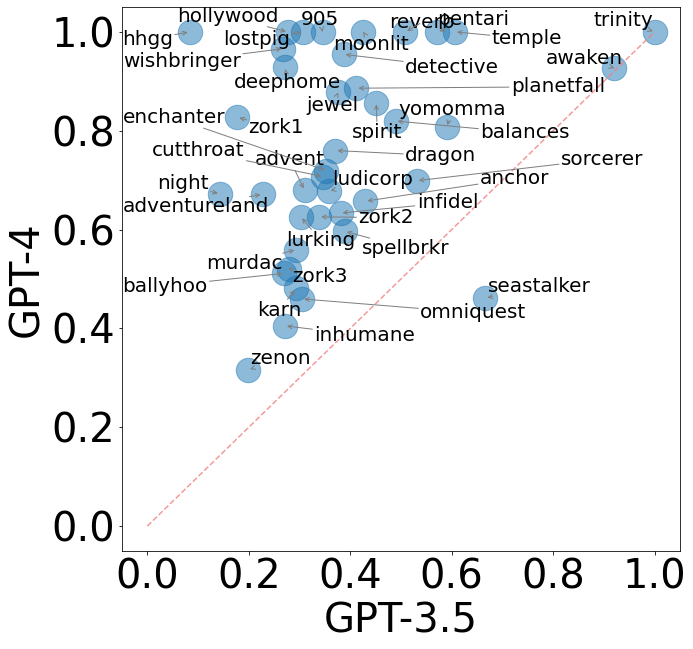

In [20]:
plot_vs(f'./gpt3_vs_gpt4_df_sr_{mode}.pdf', gpt3_stepnav_success_rate, gpt4_stepnav_success_rate, game_names)

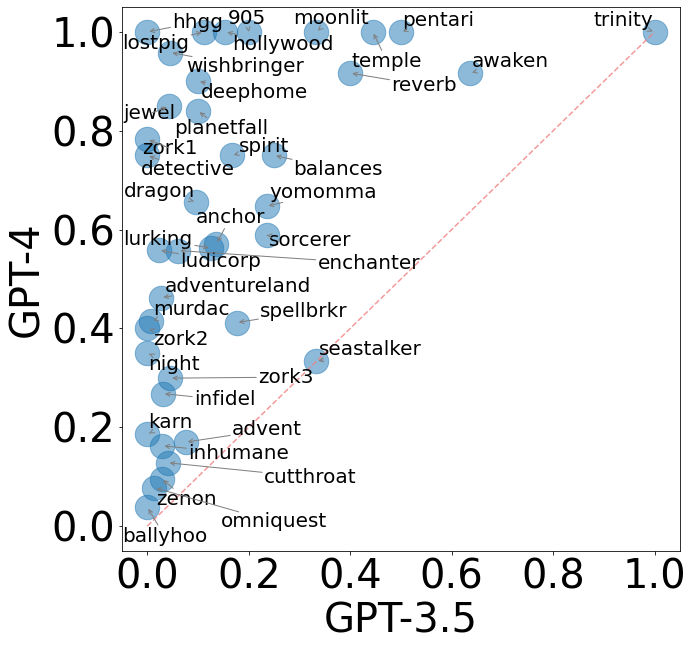

In [21]:
plot_vs(f'./gpt3_vs_gpt4_df_ra_{mode}.pdf', gpt3_stepnav_reasoning_acc, gpt4_stepnav_reasoning_acc, game_names)

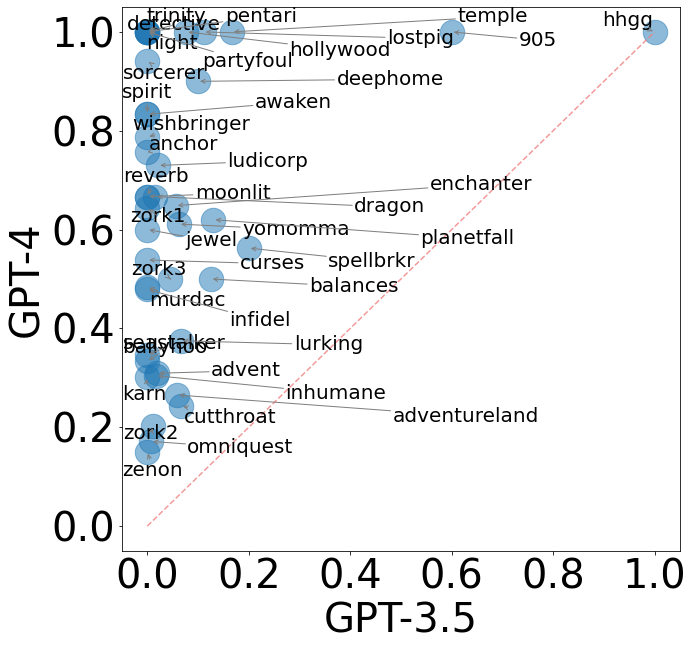

In [22]:
plot_vs(f'./gpt3_vs_gpt4_rf_sr_{mode}.pdf', gpt3_pathgen_success_rate, gpt4_pathgen_success_rate, game_names)

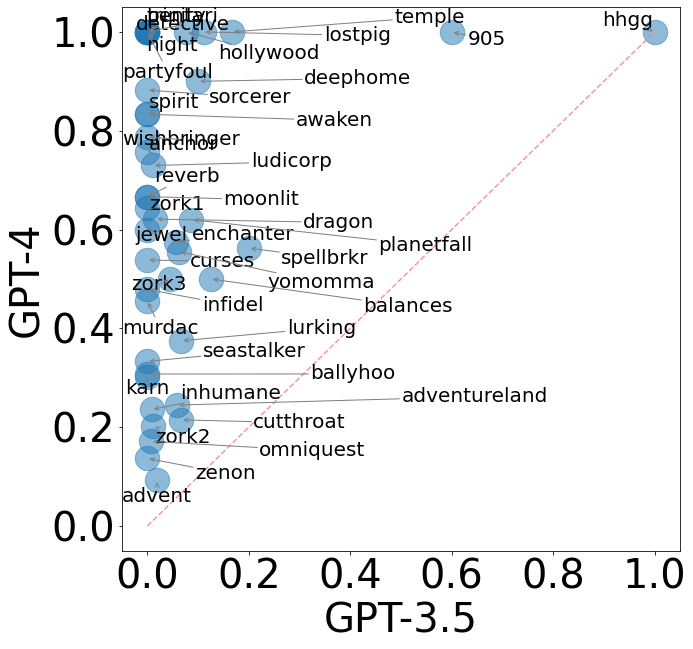

In [23]:
plot_vs(f'./gpt3_vs_gpt4_rf_ra_{mode}.pdf', gpt3_pathgen_reasoning_acc, gpt4_pathgen_reasoning_acc, game_names)

In [19]:
df = pd.read_csv(gpt4_pathgen)
gpt4_pathgen_success_rate=df['success_rate'].tolist()[:-2]
gpt4_pathgen_reasoning_acc=df['reasoning_acc'].tolist()[:-2]

df = pd.read_csv(gpt4_stepnav)
gpt4_stepnav_success_rate=df['success_rate'].tolist()[:-2]
gpt4_stepnav_reasoning_acc=df['reasoning_acc'].tolist()[:-2]

df = pd.read_csv(gpt3_pathgen)
gpt3_pathgen_success_rate=df['success_rate'].tolist()[:-2]
gpt3_pathgen_reasoning_acc=df['reasoning_acc'].tolist()[:-2]

df = pd.read_csv(gpt3_stepnav)
gpt3_stepnav_success_rate=df['success_rate'].tolist()[:-2]
gpt3_stepnav_reasoning_acc=df['reasoning_acc'].tolist()[:-2]

In [20]:
import json
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from colors import COLOR_MAP

GLOBAL_FONTSIZE = 13


53


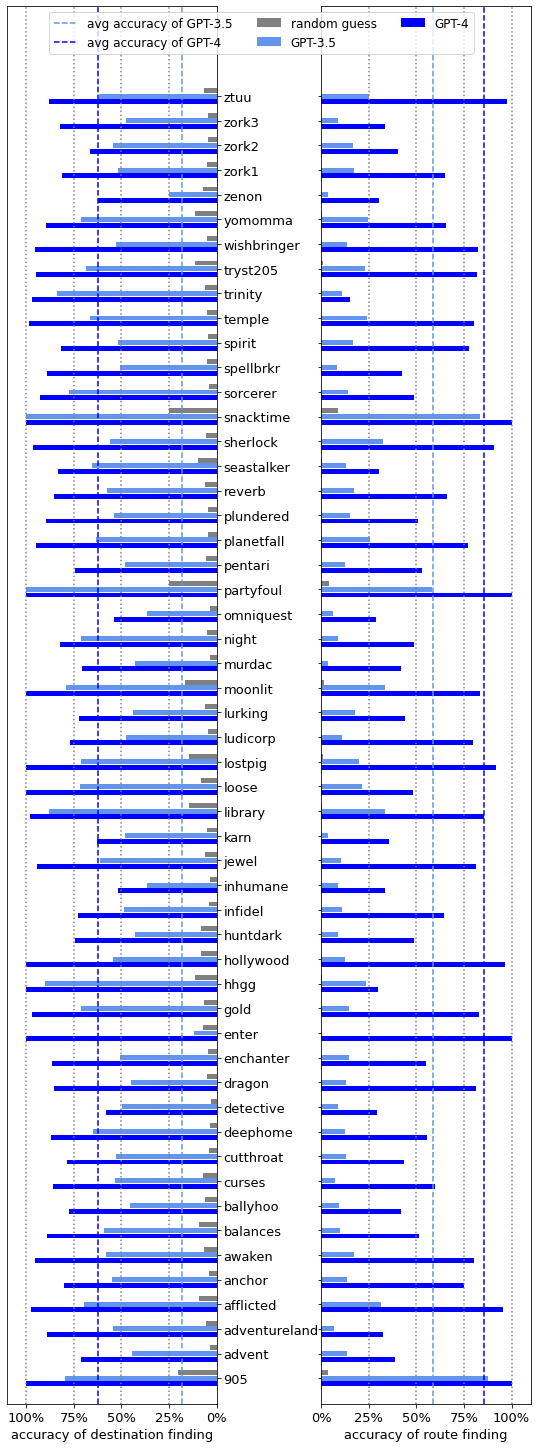

In [21]:
def random_guess_rate(all2all, locations):
    """
    for stepnav, random guess correctness rate is 1/num_locations
    for pathgen, random guess correctness rate is (1/{num_actions + stop})^avg_path_len
    """
    total_steps = 0
    total_entries = float(len(all2all))
    for each in all2all:
        total_steps += int(each["step_count"])
    avg_entries = total_steps / total_entries

    total_locs = len(locations)

    stepnav_random_guess_rate = 1.0 / total_locs
    pathgen_random_guess_rate = math.pow(1.0 / (total_locs + 1), avg_entries)
    return stepnav_random_guess_rate, pathgen_random_guess_rate


# get game names from ./data/maps-release, the folder names are the game names
# game_names = os.listdir("./data/maps-release")
# sort by alphabetical order
#game_names.sort(reverse=True)
num_games = len(game_names)
print(len(game_names))

# Generate dummy random scores for each model and task
np.random.seed(25)
random_scores_DF = {}
random_scores_RF = {}
avg_acc_RF = {
    "gpt3.5": 0.0,
    "gpt4": 0.0,
}
avg_acc_DF = {
    "gpt3.5": 0.0,
    "gpt4": 0.0,
}

# get number of entry in each game folder
for game_name in game_names:
    all2all_path = f"/share/data/mei-work/kangrui/github/mango/data/{game_name}/{game_name}.all2all.json"
    location_path = f"/share/data/mei-work/kangrui/github/mango/data/{game_name}/{game_name}.locations.json"
    all2all = json.load(open(all2all_path))
    locations = json.load(open(location_path))
    random_desti, random_route = random_guess_rate(all2all, locations)
    # json load the file and count entry number
    random_scores_DF[game_name] = random_desti
    random_scores_RF[game_name] = random_route


model1_scores_DF = np.zeros(num_games)
model2_scores_DF = np.zeros(num_games)
model1_scores_RF = np.zeros(num_games)
model2_scores_RF = np.zeros(num_games)
model1_scores_DF = {k: gpt3_stepnav_success_rate[i] for i, k in enumerate(game_names)}
model2_scores_DF = {k: gpt4_stepnav_success_rate[i] for i, k in enumerate(game_names)}
model1_scores_RF = {k: gpt3_pathgen_success_rate[i] for i, k in enumerate(game_names)}
model2_scores_RF = {k: gpt4_pathgen_success_rate[i] for i, k in enumerate(game_names)}

# load real data from ./data/{model}
# model1_real_path_route = f"{TEMP_DATA}/gpt3.5/route.json"
# model2_real_path_route = f"{TEMP_DATA}/gpt4/route.json"
# model1_real_path_desti = f"{TEMP_DATA}/gpt3.5/desti.json"
# model2_real_path_desti = f"{TEMP_DATA}/gpt4/desti.json"
# model1_real_route = json.load(open(model1_real_path_route))
# model2_real_route = json.load(open(model2_real_path_route))
# model1_real_desti = json.load(open(model1_real_path_desti))
# model2_real_desti = json.load(open(model2_real_path_desti))

# replace fake data with real data, use nice version, skip if game name missed
presented_games = []
for game_name in game_names:
    presented_games.append(game_name)
    # route
#     if game_name in model1_real_route:
#         model1_scores_RF[game_name] = model1_real_route[game_name]["nice"]
#     if game_name in model2_real_route:
#         model2_scores_RF[game_name] = model2_real_route[game_name]["nice"]
#     # desti
#     if game_name in model1_real_desti:
#         model1_scores_DF[game_name] = model1_real_desti[game_name]["nice"]
#     if game_name in model2_real_desti:
#         model2_scores_DF[game_name] = model2_real_desti[game_name]["nice"]

avg_acc_RF["gpt3.5"] = np.mean(gpt3_stepnav_success_rate)
avg_acc_RF["gpt4"] = np.mean(gpt4_stepnav_success_rate)
avg_acc_DF["gpt3.5"] = np.mean(gpt3_pathgen_success_rate)
avg_acc_DF["gpt4"] = np.mean(gpt4_pathgen_success_rate)

# ============== following is the plotting part ==============

# Set the figure size and create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 20), sharey=True)
plt.tight_layout()

# Calculate the width for each bar group
bar_width = 6
space_btw_bar = 1

# Set the positions of the bars on the x-axis
r2 = np.arange(len(game_names)) * 30
r1 = [x + (bar_width + space_btw_bar) for x in r2]
r3 = [x - (bar_width + space_btw_bar) for x in r2]

# Plot the scores for DF - Model 1, Model 2, and Random
ax1.barh(
    r1,
    [random_scores_DF[each] for each in game_names],
    height=bar_width,
    label="random guess",
    color=COLOR_MAP["random"],
)
ax1.barh(
    r2,
    [model1_scores_DF[each] for each in game_names],
    height=bar_width,
    label="GPT-3.5",
    color=COLOR_MAP["gpt3.5"],
)
ax1.barh(
    r3,
    [model2_scores_DF[each] for each in game_names],
    height=bar_width,
    label="GPT-4",
    color=COLOR_MAP["gpt4"],
)

# Plot the scores for RF - Model 1, Model 2, and Random
ax2.barh(
    r1,
    [random_scores_RF[each] for each in game_names],
    height=bar_width,
    label="random guess",
    color=COLOR_MAP["random"],
)
ax2.barh(
    r2,
    [model1_scores_RF[each] for each in game_names],
    height=bar_width,
    label="GPT-3.5",
    color=COLOR_MAP["gpt3.5"],
)
ax2.barh(
    r3,
    [model2_scores_RF[each] for each in game_names],
    height=bar_width,
    label="GPT-4",
    color=COLOR_MAP["gpt4"],
)

# Set the y-axis labels as test names
whitespace = 0.02 * max(r2)
ax1.set_ylim(
    -whitespace, max(r2) + 3.5 * whitespace
)  # Adjust the y-axis limits as needed

#ax1.set_yticks(r2, game_names, fontsize=GLOBAL_FONTSIZE, ha="left")

ax1.set_yticks(r2)
ax1.set_yticklabels(game_names, fontsize=GLOBAL_FONTSIZE, ha="left")

ax1.yaxis.tick_right()

# Set the x-axis labels
ax1.set_xlabel("accuracy of destination finding", fontsize=GLOBAL_FONTSIZE)
ax2.set_xlabel("accuracy of route finding", fontsize=GLOBAL_FONTSIZE)

# Set the x-axis limits
ax1.set_xlim(1.1, 0)  # Set the x-axis range for DF
ax2.set_xlim(0, 1.1)  # Set the x-axis range for RF

ax1.set_xticks(
    [0, 0.25, 0.5, 0.75, 1.0],
#     ["0%", "25%", "50%", "75%", "100%"],
#     fontsize=GLOBAL_FONTSIZE,
)
ax1.set_xticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=GLOBAL_FONTSIZE)

ax2.set_xticks(
    [0, 0.25, 0.5, 0.75, 1.0],
#     ["0%", "25%", "50%", "75%", "100%"],
#     fontsize=GLOBAL_FONTSIZE,
)
ax2.set_xticklabels(["0%", "25%", "50%", "75%", "100%"], fontsize=GLOBAL_FONTSIZE)

# Add dotted lines at x=0.5 and x=1
ax1.axvline(0.25, color="gray", linestyle="dotted")
ax1.axvline(0.5, color="gray", linestyle="dotted")
ax1.axvline(0.75, color="gray", linestyle="dotted")
ax1.axvline(1, color="gray", linestyle="dotted")
ax2.axvline(0.25, color="gray", linestyle="dotted")
ax2.axvline(0.5, color="gray", linestyle="dotted")
ax2.axvline(0.75, color="gray", linestyle="dotted")
ax2.axvline(1, color="gray", linestyle="dotted")

# plot avg accuracy for each model, using color of the model dotted
ax1.axvline(
    avg_acc_DF["gpt3.5"],
    color=COLOR_MAP["gpt3.5"],
    linestyle="dashed",
    label="avg accuracy of GPT-3.5",
)
ax1.axvline(
    avg_acc_DF["gpt4"],
    color=COLOR_MAP["gpt4"],
    linestyle="dashed",
    label="avg accuracy of GPT-4",
)
ax2.axvline(
    avg_acc_RF["gpt3.5"],
    color=COLOR_MAP["gpt3.5"],
    linestyle="dashed",
    label="avg accuracy of GPT-3.5",
)
ax2.axvline(
    avg_acc_RF["gpt4"],
    color=COLOR_MAP["gpt4"],
    linestyle="dashed",
    label="avg accuracy of GPT-4",
)

# # Set the title for each subplot
# ax1.set_title("DF Scores")
# ax2.set_title("RF Scores")

# Move the legend to the upper right corner with a row layout
# Create a single legend for both subplots in the upper center position
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

fig.legend(
    unique_handles,
    unique_labels,
    loc="upper center",
    ncol=3,
    fontsize="large",
    bbox_to_anchor=(0.5, 0.99),
)

# Add extra space on the left and right sides of the plot
plt.subplots_adjust(wspace=0.5)  # Adjust the value as needed

# Save the plot as a PNG file
png_path = "./scoreboard_together.pdf"
plt.savefig(png_path, bbox_inches="tight", dpi=300)

# Display the plot
plt.show()